# Geospatial - Vector Operations

Spatial operations involving vector data

## Check libraries

In [2]:
# Load relevant R packages
inLibraries = list('repr','rgdal','rgeos')
for (rpack in inLibraries) {
  if (is.element(rpack,installed.packages()[,1])){
      #Load the library into R
      suppressMessages(library(rpack,character.only = TRUE))
    }
    else {
        print(paste("Warning:  ",rpack," is not an installed package"))
    }
}
#resize plot area
options(repr.plot.width=6, repr.plot.height=6)

## Vector Operations  (points, lines, polygons)

There are a variety of vector operations supported by functions in R. Let's explore a few of these using the Puerto Rico .shp file (puertorico/PuertoRicoUTM.shp) which contains polygons representing administrative areas of the territory.  First, read the shp file and then display the polygons on the screen.

In [3]:
# read in shp file 
ppolys <- readOGR("datasets/puertorico", "PuertoRicoUTM")

OGR data source with driver: ESRI Shapefile 
Source: "datasets/puertorico", layer: "PuertoRicoUTM"
with 73 features
It has 10 fields
Integer64 fields read as strings:  ID cuerdas_07 cuerdas_02 


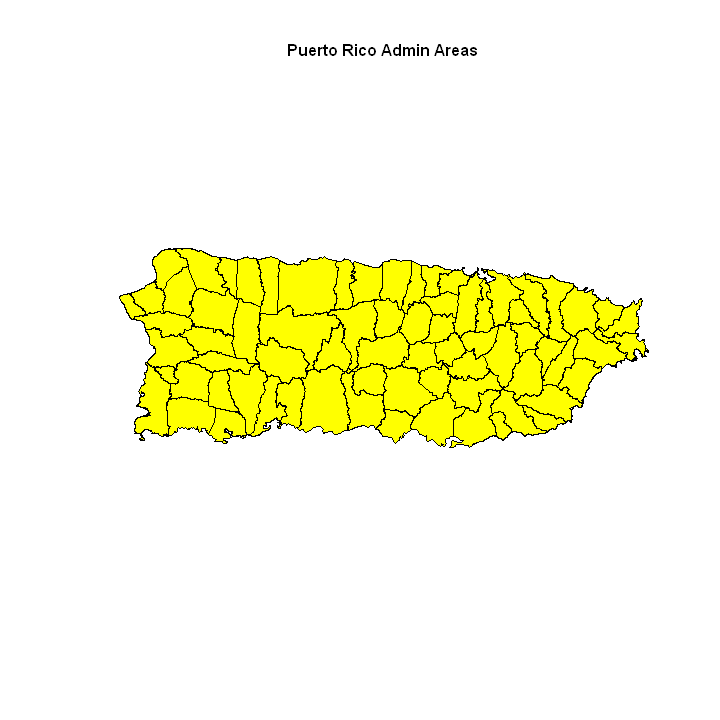

In [4]:
# map shp file

plot(ppolys, col = "yellow", main = "Puerto Rico Admin Areas", cex.main = 0.8)

## Geometric Union

Whether working with points, line or polygons, one common operation involves assessing the geometric union among geometries. For example, a set of connected lines can be transformed into a single line, a set of adjacent polygons can be transformed into a single polygon, etc.

To examine how unions of features work, let's select a set of administrative areas in Puerto Rico, that of Coamo, Aibonito, Jayuya, and Barranquitas.

In [15]:
# select a set of features to examine

selAreas <- c("COAMO", "AIBONITO", "BARRANQUITAS", "JAYUYA")
selAreas

[1] "COAMO"        "AIBONITO"     "BARRANQUITAS" "JAYUYA"

In [19]:
names(ppolys@data)

[1] "MUNICIPALI" "NUM"        "ADM"        "ID"         "nofarms_07"
 [6] "nofarms_02" "cuerdas_07" "cuerdas_02" "area"       "popden"

In [23]:
ppolys@data$MUNICIPALI[0:20]

[1] ISABELA       AGUADILLA     HATILLO       CAMUY         VEGA-BAJA    
 [6] QUEBRADILLAS  VEGA-ALTA     DORADO        MOCA          CAROLINA     
[11] RIO-GRANDE    TOA-ALTA      SAN-SEBASTIAN LUQUILLO      TRUJILLO-ALTO
[16] MOROVIS       COROZAL       LARES         NARANJITO     ANASCO       
73 Levels: ADJUNTAS AGUADA AGUADILLA AGUAS-BUENAS AIBONITO ANASCO ... YAUCO

In [24]:
FeatA <- ppolys[ppolys@data$MUNICIPALI %in% selAreas, ]

### Plot and label features

In order to position the labels of the areas, the gCentroid() function (rgdal library) can be used to obtain the centroids of each polygon and the coordinates() function can be used to extract the x and y coordinates repectively.

In [9]:
# get the centroids of the polygons
centroids <- gCentroid(ppolys, byid = TRUE)
centroidLons <- coordinates(centroids)[, 1]
centroidLats <- coordinates(centroids)[, 2]

In [11]:
centroids[0:5]

SpatialPoints:
          x       y
0  76740.21 2044797
1  64576.34 2046107
2  98768.65 2039977
3  92014.22 2041032
4 141015.92 2041279
Coordinate Reference System (CRS) arguments: +proj=utm +zone=20
+ellps=clrk66 +units=m +no_defs 

In [12]:
centroidLons[0:5]

0         1         2         3         4 
 76740.21  64576.34  98768.65  92014.22 141015.92

In [13]:
centroidLats[0:5]

0       1       2       3       4 
2044797 2046107 2039977 2041032 2041279

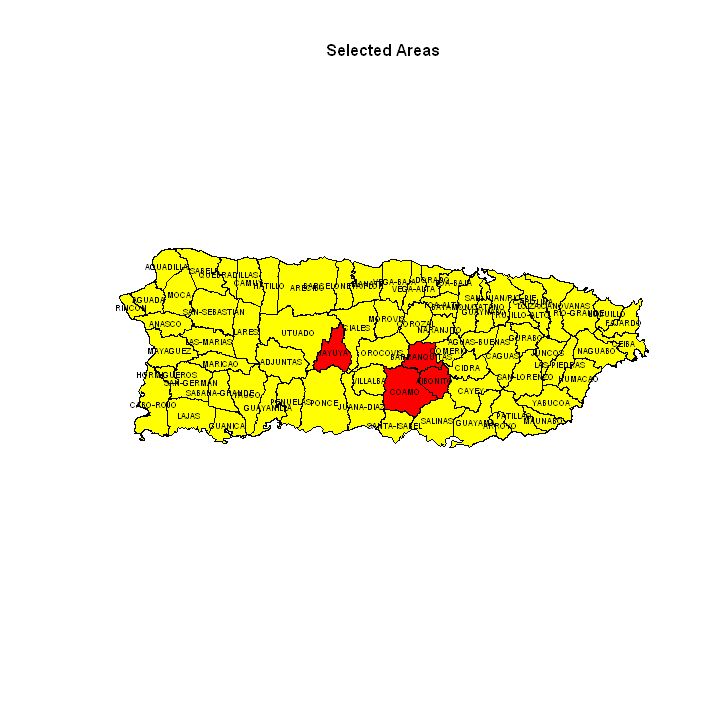

In [14]:
# display selected features

plot(ppolys, col = "yellow", main = "Selected Areas", cex.main = 0.8)
plot(FeatA, col = "red", add = TRUE)

# add labels to map
text(centroidLons, centroidLats, labels = ppolys$MUNICIPALI, cex = 0.4)

Identify a geometric union that exists among the three selected features. This can be accomplished using the gUnaryUnion() function (rgeos library). In the example below, the union of the four areas is two single polygons outlined in red. One polygon is created for the three adjacent areas while the second polygon represents the non-adjacent area. See the rgeos library documentation for other ways of assessing a union given different input types.

In [26]:
# geometric union
FeatA.union <- gUnaryUnion(FeatA)

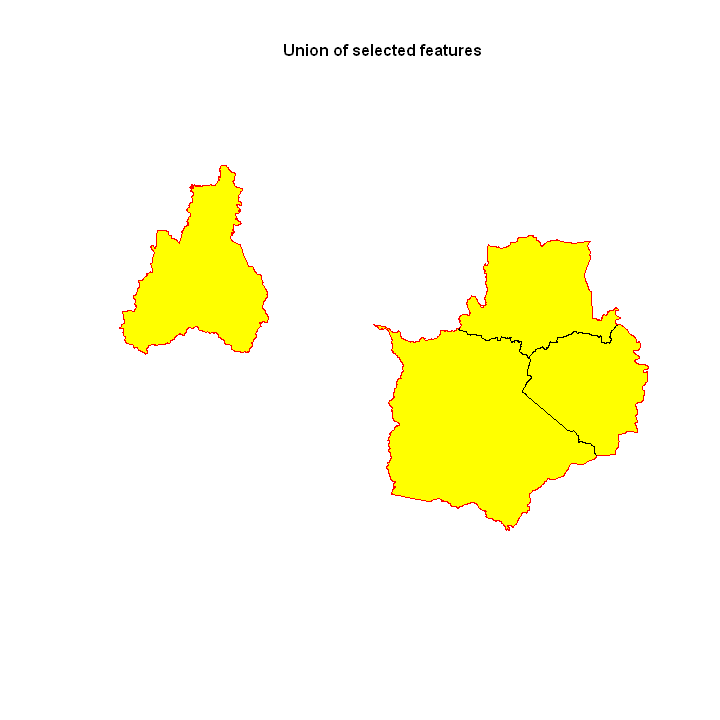

In [30]:
# display selected features and their union
plot(FeatA, col = "yellow", main = "Union of selected features", cex.main = 0.8)
plot(FeatA.union, border = "red", add = TRUE)

## Containment

Geometric comparisons can also be made among features.  One important type of comparison is assessment of containment - i.e. does one feature contain another. To demonstrate this using the gContains() function (rgeos library) let's assess whether or not 'PENUELAS' is one of the areas within the union just created (it's not).

Then let's try and test if 'BARRANQUITAS' is within the union.

In [32]:
# assess containment in the union
doesContain <- gContains(FeatA.union, ppolys[ppolys@data$MUNICIPALI == "PENUELAS", ])
doesContain

[1] FALSE

In [33]:
# assesss containment within the union
doesContain <- gContains(FeatA.union, ppolys[ppolys@data$MUNICIPALI == "BARRANQUITAS", ])
doesContain

[1] TRUE

## Intersection

Another important type of vector operation is the geometric intersection among features. In some cases, we may want to compute the actual geometric intersection of a set of features.  In others, we may simply want to test if features may intersect.

First, lets compute the geometric intersection of Barranquitas and Aibonito. This can be done using the gIntersection() function (rgeos library). The result of a geometric intersection is a new feature or set of features.

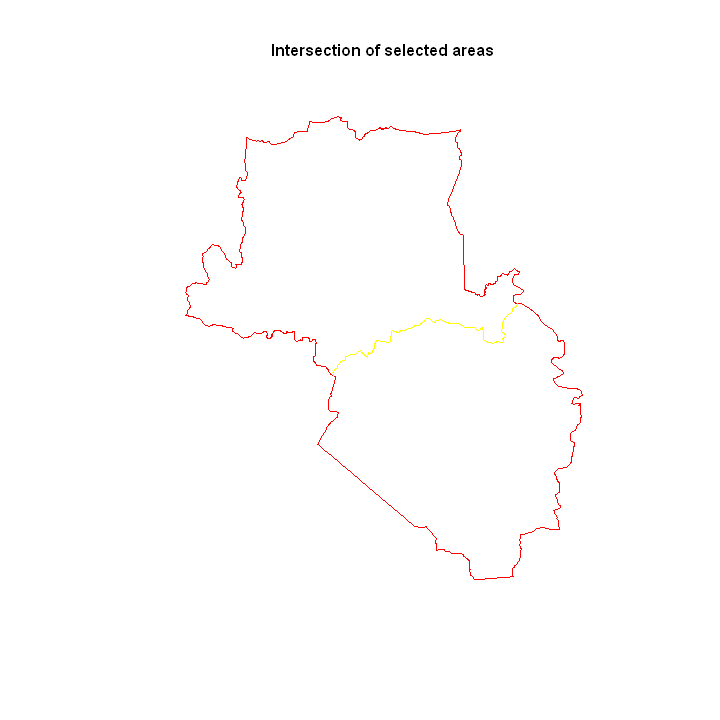

In [35]:
# compute geometric intersection
interPolys <- gIntersection(ppolys[ppolys@data$MUNICIPALI == "BARRANQUITAS",], ppolys[ppolys@data$MUNICIPALI == "AIBONITO",])

plot(ppolys[ppolys@data$MUNICIPALI %in% c("BARRANQUITAS", "AIBONITO"),], 
             border = "red", 
             main = "Intersection of selected areas", 
             cex.main = 0.8)

plot(interPolys, col = "yellow", add = TRUE)

To just test if a set of features intersect, the gIntersect() function (rgeos library) can be applied. 

The code below tests for intersection of Barranquitas and Aibonito. Then it tests for intersection of Barranquitas and Jayuya.

In [37]:
# assess if features intersect
doesIntersect <- gIntersects(ppolys[ppolys@data$MUNICIPALI == "BARRANQUITAS",], 
                                ppolys[ppolys@data$MUNICIPALI == "AIBONITO",])

doesIntersect

[1] TRUE

In [40]:
# assess if features intersect
doesIntersect <- gIntersects(ppolys[ppolys@data$MUNICIPALI == "BARRANQUITAS", ], 
                               ppolys[ppolys@data$MUNICIPALI == "JAYUYA",])

doesIntersect

[1] FALSE

## Symmetric Difference

Provided two sets of features, another vector operation is to compute their symmetric difference. In this sense, the symmetric difference is the elements of one set that are not shared with the other set. The gSymdifference() function (rgeos library) can be used to do this.  To illustrate this concept, let's compute the symmetric difference between the administrative areas and the union of four areas that was created earlier.

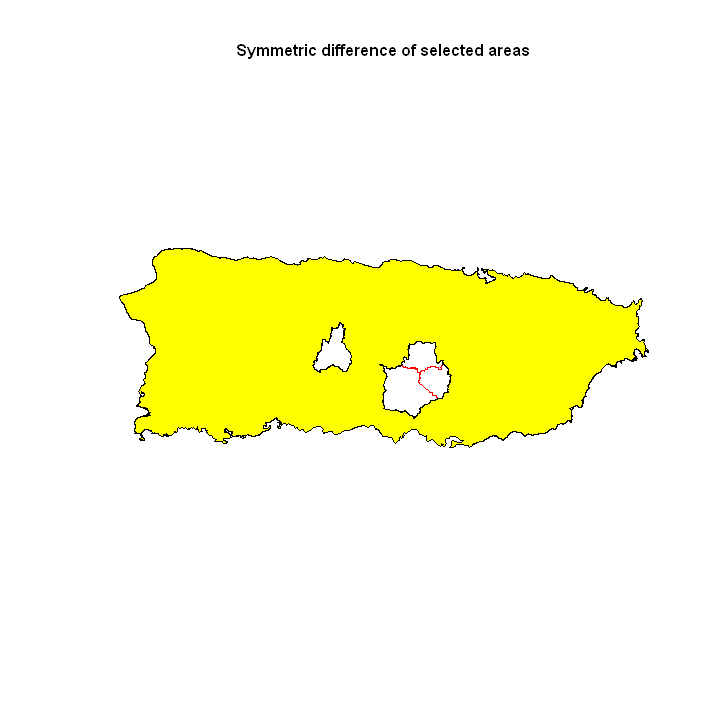

In [42]:
# symmetric difference
sym <- gSymdifference(ppolys, FeatA.union)

# plot the symmetric difference
plot(ppolys, border = "red", main = "Symmetric difference of selected areas", cex.main = 0.8)
plot(sym, col = "yellow", add = TRUE)